# Vending Machine Sales Exploratory Data Analysis

## Data Preprocessing

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset 
df = pd.read_csv('dataset/vending_machine_sales.csv')

In [3]:
df.head()

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022


In [4]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9617 entries, 0 to 9616
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       9617 non-null   object 
 1   Device ID    9617 non-null   object 
 2   Location     9617 non-null   object 
 3   Machine      9617 non-null   object 
 4   Product      9611 non-null   object 
 5   Category     9350 non-null   object 
 6   Transaction  9617 non-null   int64  
 7   TransDate    9617 non-null   object 
 8   Type         9617 non-null   object 
 9   RCoil        9617 non-null   int64  
 10  RPrice       9617 non-null   float64
 11  RQty         9617 non-null   int64  
 12  MCoil        9617 non-null   int64  
 13  MPrice       9614 non-null   float64
 14  MQty         9617 non-null   int64  
 15  LineTotal    9617 non-null   float64
 16  TransTotal   9617 non-null   float64
 17  Prcd Date    9617 non-null   object 
dtypes: float64(4), int64(5), object(9)
memory usage:

In [5]:
# Convert 'TransDate' and 'Prcd Date' to DateTime format 
df[['TransDate','Prcd Date']] = df[['TransDate','Prcd Date']].applymap(pd.to_datetime)

In [6]:
# check duplicates
df.duplicated().sum()

0

In [7]:
# check NA values
df.isna().sum()

Status           0
Device ID        0
Location         0
Machine          0
Product          6
Category       267
Transaction      0
TransDate        0
Type             0
RCoil            0
RPrice           0
RQty             0
MCoil            0
MPrice           3
MQty             0
LineTotal        0
TransTotal       0
Prcd Date        0
dtype: int64

Given that both 'Product' and 'Category' columns contain missing values, and considering their interrelation, we will drop rows where both columns have missing values. Furthermore, if one of these columns has a valid value while the other is missing, we will assign the missing value based on a relevant and logical relationship.

In [8]:
df = df.dropna(subset=['Product', 'Category'], how='all')

In [9]:
df[['Product', 'Category', 'MPrice']].isna().sum()

Product       0
Category    261
MPrice        0
dtype: int64

In [10]:
# check the composition of category
count = df.Category.value_counts(dropna=False)
proportion = df.Category.value_counts(dropna=False)/len(df)
pd.DataFrame({'Count': count, 'Proportion': proportion})

,Count,Proportion
Food,5293,0.550723
Carbonated,2377,0.247321
Non Carbonated,1023,0.106441
Water,657,0.068359
NaN,261,0.027156


In [11]:
# check distinct NA to see the relationship between products and category
p_df = df[['Product','Category','MPrice']].drop_duplicates()
p_df[p_df.isna().any(axis=1)]

,Product,Category,MPrice
1448,Doritos Dinamita Chile Lemon,NaN,1.00
1453,Doritos Dinamita Chile Lemon,NaN,1.50
2845,Doritos Spicy Nacho,NaN,1.50
2871,Mini Chips Ahoy - Go Paks,NaN,4.00
2888,Oreo Mini - Go Paks,NaN,4.00
3162,Teddy Grahams - Go Paks,NaN,4.00
3327,Starbucks Doubleshot Energy - Coffee,NaN,3.50
3693,Canada Dry - Ginger Ale & Lemonde,NaN,2.00
3864,Canada Dry - Ginger Ale,NaN,2.75
3965,Teddy Grahams - Go Paks,NaN,3.00


Most missing Category entries are for products in the 'Food' category, with exceptions like 'Canada Dry' in 'Carbonated' and 'Starbucks Coffee' in 'Non-Carbonated'. We will address beverages and assign the rest to 'Food'.

In [12]:
df.loc[df.Product.str.contains('Canada Dry'), 'Category'] = df.loc[df.Product.str.contains('Canada Dry'), 'Category'].fillna('Carbonated')

In [13]:
df.loc[df.Product.str.contains('Starbucks'), 'Category'] = df.loc[df.Product.str.contains('Starbucks'), 'Category'].fillna('Non Carbonated')

In [14]:
df.Category.fillna('Food', inplace=True)

In [15]:
# check the composition of category again to see if there are still any NaN values
count = df.Category.value_counts(dropna=False)
proportion = df.Category.value_counts(dropna=False)/len(df)
pd.DataFrame({'Count': count, 'Proportion': proportion})

,Count,Proportion
Food,5475,0.569660
Carbonated,2431,0.252939
Non Carbonated,1048,0.109042
Water,657,0.068359


In [16]:
# summary statistics of numeric variables
df.describe()

,Transaction,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal
count,9.611000e+03,9611.000000,9611.000000,9611.000000,9611.000000,9611.000000,9611.000000,9611.000000,9611.000000
mean,1.538231e+10,132.986058,1.958381,1.014775,132.986058,1.958381,1.014775,1.985667,2.220633
std,4.403371e+08,13.358922,0.698778,0.127369,13.358922,0.698778,0.127369,0.744427,1.084731
min,1.451578e+10,110.000000,1.000000,1.000000,110.000000,1.000000,1.000000,1.000000,1.000000
25%,1.503999e+10,122.000000,1.500000,1.000000,122.000000,1.500000,1.000000,1.500000,1.500000
50%,1.538346e+10,138.000000,1.500000,1.000000,138.000000,1.500000,1.000000,1.500000,2.000000
75%,1.573893e+10,144.000000,2.500000,1.000000,144.000000,2.500000,1.000000,2.500000,2.750000
max,1.617733e+10,165.000000,5.000000,3.000000,165.000000,5.000000,3.000000,8.000000,9.000000


The descriptive summaries of the real columns (Coil, Price, Qty) closely resemble those of the corresponding mapping columns. To verify, we will compare the values in the real columns to those in the mapping columns for identicalness.

In [17]:
df.RCoil.equals(df.MCoil)

True

In [18]:
df.RPrice.equals(df.MPrice)

True

In [19]:
df.RQty.equals(df.MQty)

True

In [20]:
# explore categorical variables
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns.describe()

,Status,Device ID,Location,Machine,Product,Category,Type
count,9611,9611,9611,9611,9611,9611,9611
unique,1,5,4,5,184,4,2
top,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Coca Cola - Zero Sugar,Food,Cash
freq,9611,3661,3661,3661,648,5475,6239


In [21]:
# check the time range of the dataset
start=df.TransDate.min()
end=df.TransDate.max()
print(f'Start date: {start} - End date: {end}')

Start date: 2022-01-01 00:00:00 - End date: 2022-12-31 00:00:00


In [22]:
# create 'month' and 'weekday' columns to facilitate time series analysis
df['month']=df.TransDate.dt.month

In [23]:
df['Weekday'] = df.TransDate.dt.weekday

## Vending Machine Sales Overview

In [24]:
# the sales overview
m_sales = df.groupby(['Location','Device ID', 'Machine'])['LineTotal'].sum().reset_index()
m_sales

,Location,Device ID,Machine,LineTotal
0,Brunswick Sq Mall,VJ300205292,BSQ Mall x1364 - Zales,1757.25
1,Brunswick Sq Mall,VJ300320611,BSQ Mall x1366 - ATT,1670.75
2,EB Public Library,VJ300320692,EB Public Library x1380,6827.75
3,Earle Asphalt,VJ300320686,Earle Asphalt x1371,1827.25
4,GuttenPlans,VJ300320609,GuttenPlans x1367,7001.25


In [25]:
plt.style.use('seaborn-pastel')

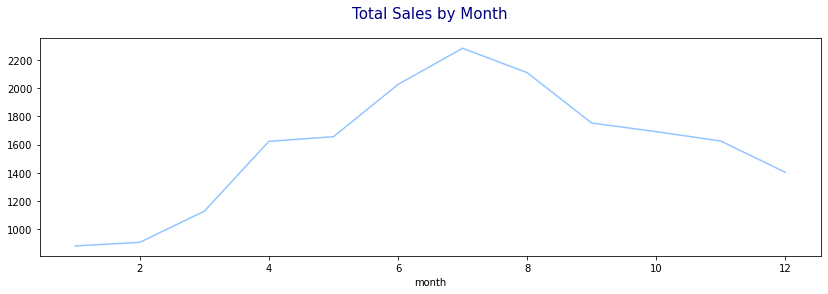

In [26]:
# find out the sales trend
plt.figure(figsize=(14,4))
df.groupby('month').LineTotal.sum().plot()
plt.title('Total Sales by Month', pad=20, color='navy', fontsize=15)
plt.show()

Total sales peaked in July. Given that we only have one year of records, it is challenging to ascertain whether there is a seasonal reason for this peak.

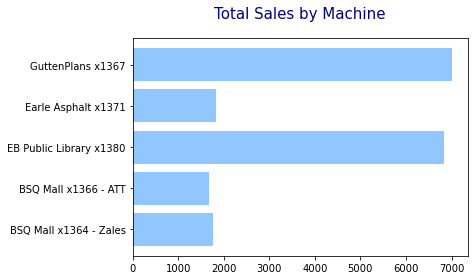

In [27]:
# find out the total sales by machine
plt.barh(m_sales.Machine, m_sales.LineTotal)
plt.title('Total Sales by Machine', pad=20, color='navy', fontsize=15)
plt.show()

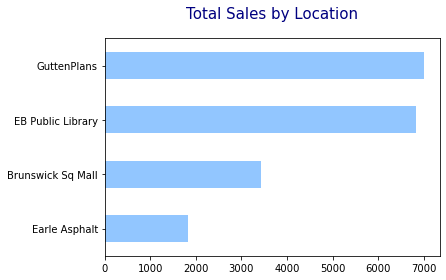

In [28]:
# find out the total sales by location
df.groupby('Location')['LineTotal'].sum().sort_values().plot(kind='barh')
plt.title('Total Sales by Location', pad=20, color='navy', fontsize=15)
plt.ylabel('')
plt.show()

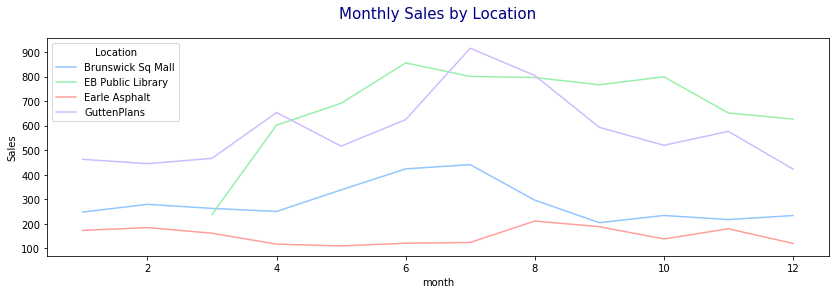

In [29]:
# find out the monthly sales by location
agg=df.groupby(['Location', 'month']).LineTotal.sum().reset_index()
plt.figure(figsize=(14,4))
sns.lineplot(data=agg, x='month', y='LineTotal', hue='Location')
plt.ylabel('Sales')
plt.title('Monthly Sales by Location', pad=20, color='navy', fontsize=15)
plt.show()

The sales trends in GuttenPlans and Brunswick Sq Mall align with the overall sales trend, both of which peaked in July.

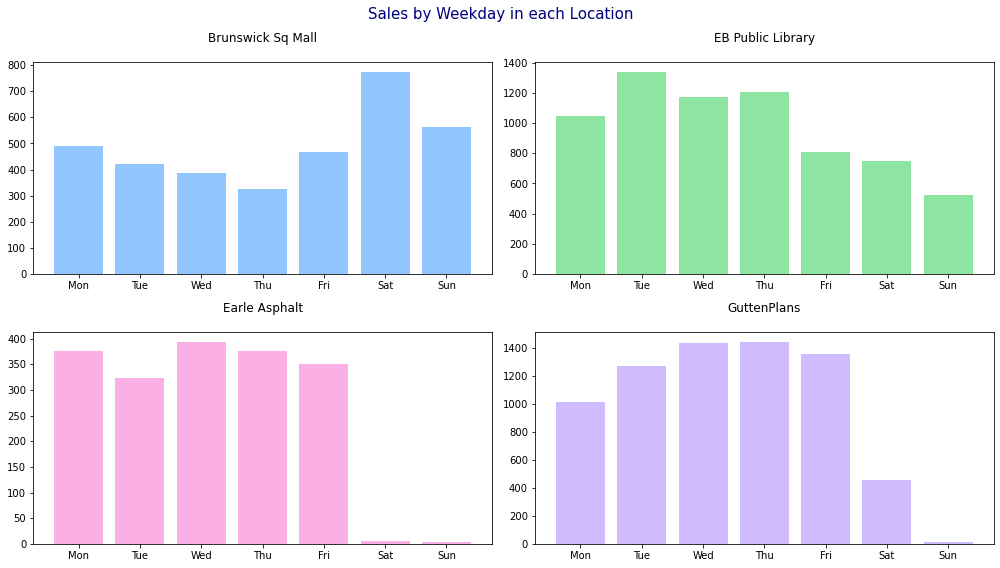

In [30]:
# find out the traffic trends in each location
plt.figure(figsize=(14,8))
week_labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
bmall=df[df.Location=='Brunswick Sq Mall'].groupby('Weekday')['LineTotal'].sum().sort_index()
eblibrary=df[df.Location=='EB Public Library'].groupby('Weekday')['LineTotal'].sum().sort_index()
earle=df[df.Location=='Earle Asphalt'].groupby('Weekday')['LineTotal'].sum().sort_index()
gutten=df[df.Location=='GuttenPlans'].groupby('Weekday')['LineTotal'].sum().sort_index()
plt.suptitle('Sales by Weekday in each Location', color='navy', fontsize=15)
plt.subplot(2,2,1)
plt.bar(week_labels, bmall)
plt.title('Brunswick Sq Mall', pad=20)
plt.subplot(2,2,2)
plt.bar(week_labels, eblibrary, color='#8de5a1')
plt.title('EB Public Library', pad=20)
plt.subplot(2,2,3)
plt.bar(week_labels, earle, color='#fab0e4')
plt.title('Earle Asphalt', pad=20)
plt.subplot(2,2,4)
plt.bar(week_labels, gutten, color='#d0bbff')
plt.title('GuttenPlans', pad=20)
plt.tight_layout()
plt.show()

Brunswick Sq Mall experiences its highest traffic during weekends, particularly on Saturdays. In contrast, EB Public Library observes higher traffic on weekdays compared to weekends. Earle Asphalt, a construction engineering firm operating five days a week, exhibits nearly equivalent weekday traffic. As for Gutten Plans, a frozen dough specialist company, its traffic follows a normal distribution from Monday to Saturday.

## Transaction Overview

In [31]:
# Transaction Overview by Location
trans=df[['Location','Transaction','TransTotal']].drop_duplicates()
trans_df=trans.groupby('Location').agg(transaction_count=('Transaction', 'count'), total_amount=('TransTotal', 'sum') )
trans_df['amount_per_trans']=trans_df.total_amount/trans_df.transaction_count
trans_df

,transaction_count,total_amount,amount_per_trans
Location,,,
Brunswick Sq Mall,1677,3428.00,2.044126
EB Public Library,2981,6829.75,2.291094
Earle Asphalt,996,1827.25,1.834588
GuttenPlans,3457,7001.25,2.025239


Earle Asphalt has the lowest transaction amount, at $1.83, among the four locations, while EB Public Library has the highest, at $2.29.

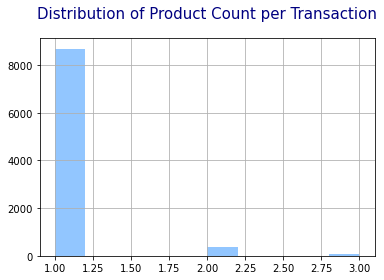

In [32]:
# find out the product count per transaction
df.groupby('Transaction').Product.count().hist()
plt.title('Distribution of Product Count per Transaction', pad=20, color='navy', fontsize=15)
plt.show()

The majority of individuals only bought a single product per transaction.

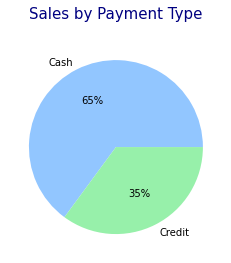

In [33]:
# find out the distribution of payment type
df.Type.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Sales by Payment Type', pad=20, color='navy', fontsize=15)
plt.show()

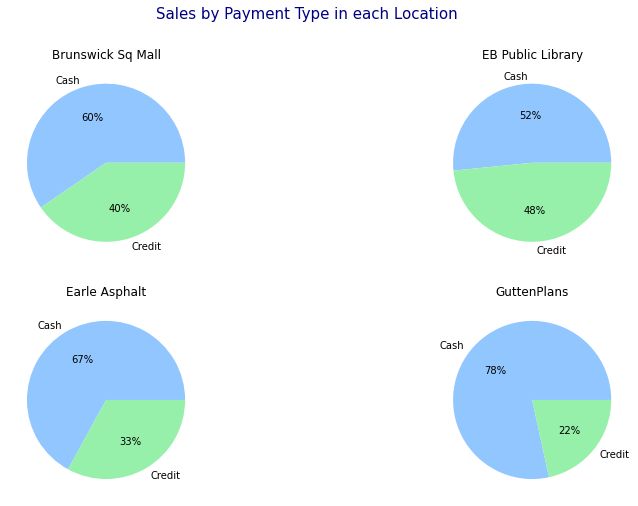

In [34]:
# payment type in each location
fig, axs= plt.subplots(2, 2, figsize=(14,8))
plt.suptitle('Sales by Payment Type in each Location', color='navy', fontsize=15)
df[df.Location=='Brunswick Sq Mall'].Type.value_counts().plot(kind='pie', autopct='%1.0f%%', ax=axs[0][0])
df[df.Location=='EB Public Library'].Type.value_counts().plot(kind='pie', autopct='%1.0f%%', ax=axs[0][1])
df[df.Location=='Earle Asphalt'].Type.value_counts().plot(kind='pie', autopct='%1.0f%%', ax=axs[1][0])
df[df.Location=='GuttenPlans'].Type.value_counts().plot(kind='pie', autopct='%1.0f%%', ax=axs[1][1])
axs[0][0].set_ylabel('')
axs[0][1].set_ylabel('')
axs[1][0].set_ylabel('')
axs[1][1].set_ylabel('')
axs[0][0].set_title('Brunswick Sq Mall')
axs[0][1].set_title('EB Public Library')
axs[1][0].set_title('Earle Asphalt')
axs[1][1].set_title('GuttenPlans')
plt.show()

Overall, 65% of the transactions are paid by cash. GuttenPlans even has a higher proportion of customers paying by cash, at 78%. Therefore, changes to the vending machine should be planned carefully in order to meet the needs of this customer base.

## Category Analysis

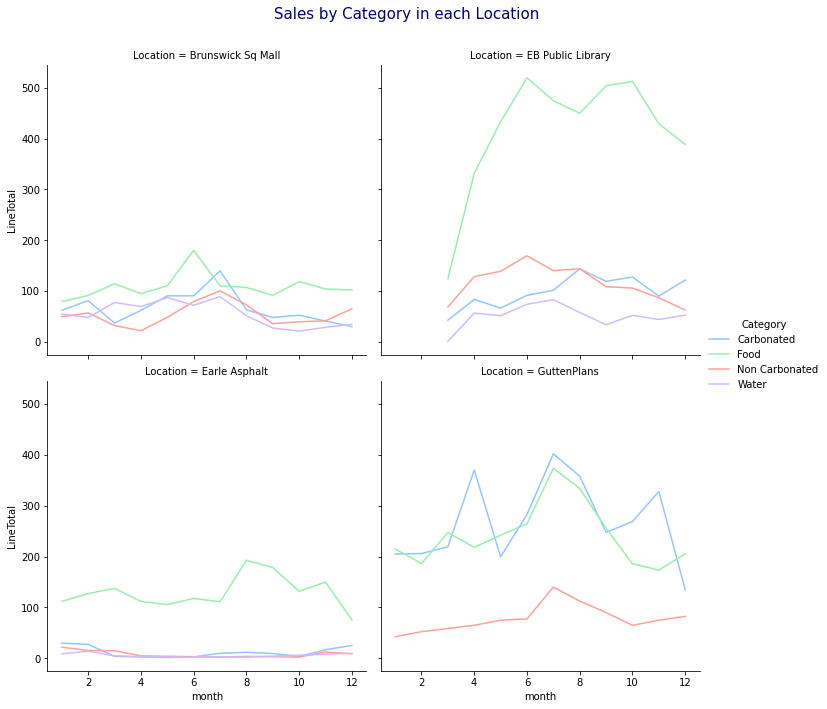

In [35]:
# find out the sales trends by category
agg1=df.groupby(['Location', 'month', 'Category']).LineTotal.sum().reset_index()
plot=sns.relplot(data=agg1, x='month', y='LineTotal', kind='line', hue='Category', col='Location', col_wrap=2)
plot.fig.suptitle('Sales by Category in each Location', color='navy', fontsize=15)
plot.fig.subplots_adjust(top=0.9)
plt.show()

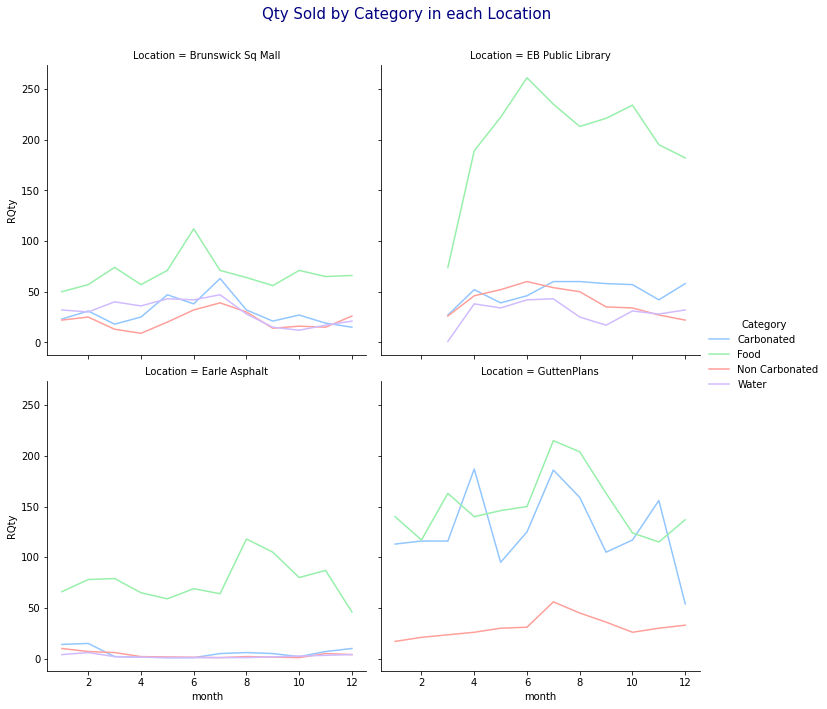

In [36]:
agg2=df.groupby(['Location', 'month', 'Category']).RQty.sum().reset_index()
plot1=sns.relplot(data=agg2, x='month', y='RQty', kind='line', hue='Category', col='Location', col_wrap=2)
plot1.fig.suptitle('Qty Sold by Category in each Location', color='navy', fontsize=15)
plot1.fig.subplots_adjust(top=0.9)
plt.show()

Among all categories, food appears to be more popular across all locations. EB Public Library, in particular, exhibits a notably high demand for food compared to the other locations. GuttenPlans experiences high demand in both the food and carbonated drink categories, while there is no demand for water (might be indicating that this location does not offer water).

In [37]:
# identify the range of products within each category and location.
uni_p=df[['Location','Category','Product']].drop_duplicates()
pd.crosstab(uni_p.Location, uni_p.Category, margins=True, margins_name='Total')

Category,Carbonated,Food,Non Carbonated,Water,Total
Location,,,,,
Brunswick Sq Mall,14,61,16,10,101
EB Public Library,9,74,15,4,102
Earle Asphalt,6,53,4,4,67
GuttenPlans,6,64,8,0,78
Total,35,252,43,18,348


As GuttenPlans has the highest sales among all and has a lower variety of products in the transaction records, this suggests that consumers at GuttenPlans have more centralized demands. In contrast, Brunswick Sq Mall and EB Public Library have more diverse demands.

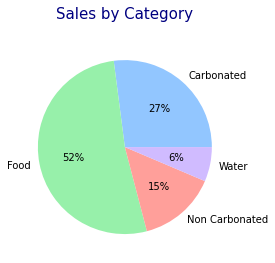

In [38]:
# find out the distributions of sales in each location
df.groupby('Category')['LineTotal'].sum().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Sales by Category', pad=20, color='navy', fontsize=15)
plt.show()

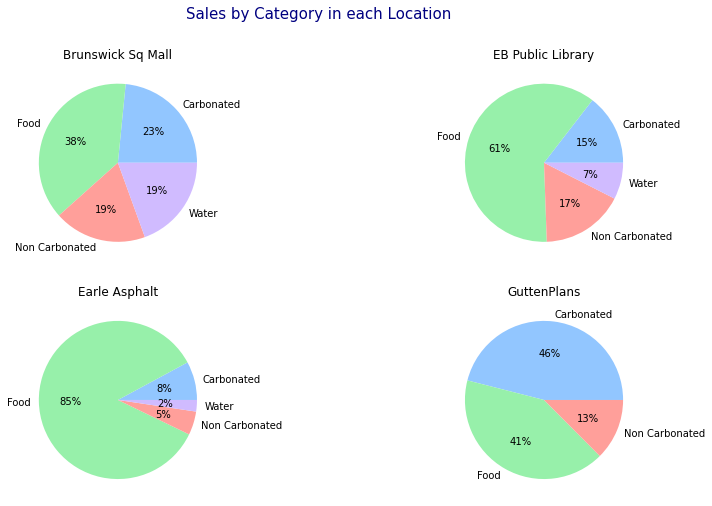

In [39]:
fig, axs= plt.subplots(2, 2, figsize=(14,8))
plt.suptitle('Sales by Category in each Location', color='navy', fontsize=15)
df[df.Location=='Brunswick Sq Mall'].groupby('Category')['LineTotal'].sum().plot(kind='pie', autopct='%1.0f%%', ax=axs[0][0])
df[df.Location=='EB Public Library'].groupby('Category')['LineTotal'].sum().plot(kind='pie', autopct='%1.0f%%', ax=axs[0][1])
df[df.Location=='Earle Asphalt'].groupby('Category')['LineTotal'].sum().plot(kind='pie', autopct='%1.0f%%', ax=axs[1][0])
df[df.Location=='GuttenPlans'].groupby('Category')['LineTotal'].sum().plot(kind='pie', autopct='%1.0f%%', ax=axs[1][1])
axs[0][0].set_ylabel('')
axs[0][1].set_ylabel('')
axs[1][0].set_ylabel('')
axs[1][1].set_ylabel('')
axs[0][0].set_title('Brunswick Sq Mall')
axs[0][1].set_title('EB Public Library')
axs[1][0].set_title('Earle Asphalt')
axs[1][1].set_title('GuttenPlans')
plt.show()

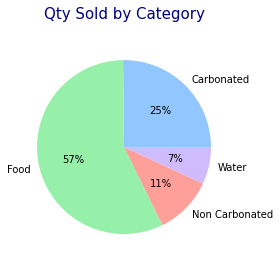

In [40]:
# find out the distributions of quantity sold in each location
df.groupby('Category')['RQty'].sum().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Qty Sold by Category', pad=20, color='navy', fontsize=15)
plt.show()

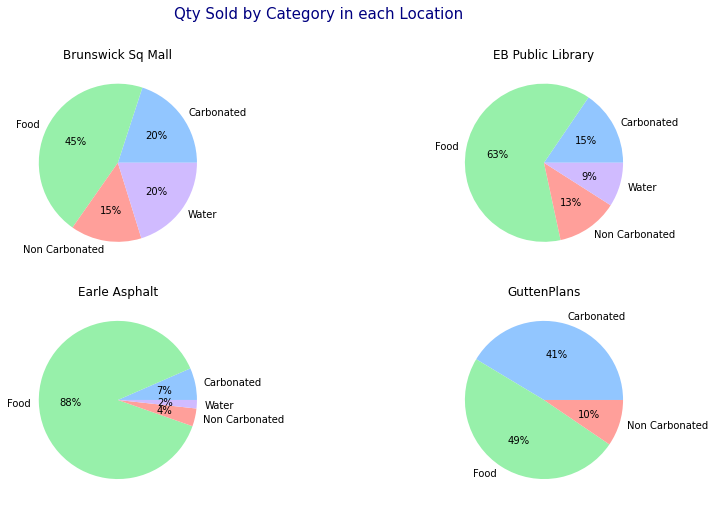

In [41]:
fig, axs= plt.subplots(2, 2, figsize=(14,8))
plt.suptitle('Qty Sold by Category in each Location', color='navy', fontsize=15)
df[df.Location=='Brunswick Sq Mall'].groupby('Category')['RQty'].sum().plot(kind='pie', autopct='%1.0f%%', ax=axs[0][0])
df[df.Location=='EB Public Library'].groupby('Category')['RQty'].sum().plot(kind='pie', autopct='%1.0f%%', ax=axs[0][1])
df[df.Location=='Earle Asphalt'].groupby('Category')['RQty'].sum().plot(kind='pie', autopct='%1.0f%%', ax=axs[1][0])
df[df.Location=='GuttenPlans'].groupby('Category')['RQty'].sum().plot(kind='pie', autopct='%1.0f%%', ax=axs[1][1])
axs[0][0].set_ylabel('')
axs[0][1].set_ylabel('')
axs[1][0].set_ylabel('')
axs[1][1].set_ylabel('')
axs[0][0].set_title('Brunswick Sq Mall')
axs[0][1].set_title('EB Public Library')
axs[1][0].set_title('Earle Asphalt')
axs[1][1].set_title('GuttenPlans')
plt.show()

The compositions of demand categories are very different among the four locations. While most locations are dominated by the food category, GuttenPlans also has a significant competing demand for carbonated products. Additionally, Brunswick Sq Mall has a unique 20% demand for water, which is not common in other locations.

In [42]:
# identify the price range in each category
df.groupby('Category').RPrice.agg(["min", "max"])

,min,max
Category,,
Carbonated,1.0,3.50
Food,1.0,5.00
Non Carbonated,1.0,4.00
Water,1.5,2.75


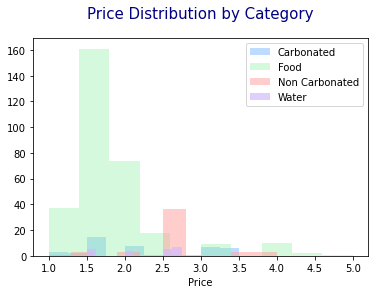

In [43]:
price=df[['Location','Category','Product','RPrice']].drop_duplicates()
Carbonated=price[price.Category=='Carbonated'].RPrice
Food=price[price.Category=='Food'].RPrice
Non_Carbonated=price[price.Category=='Non Carbonated'].RPrice
Water=price[price.Category=='Water'].RPrice
plt.hist(Carbonated, label="Carbonated", alpha=0.6)
plt.hist(Food, label="Food", alpha=0.4)
plt.hist(Non_Carbonated, label="Non Carbonated", alpha=0.5)
plt.hist(Water, label="Water", alpha=0.7)
plt.legend()
plt.title("Price Distribution by Category", pad=20, color='navy', fontsize=15)
plt.xlabel("Price")
plt.show()

## Product Analysis

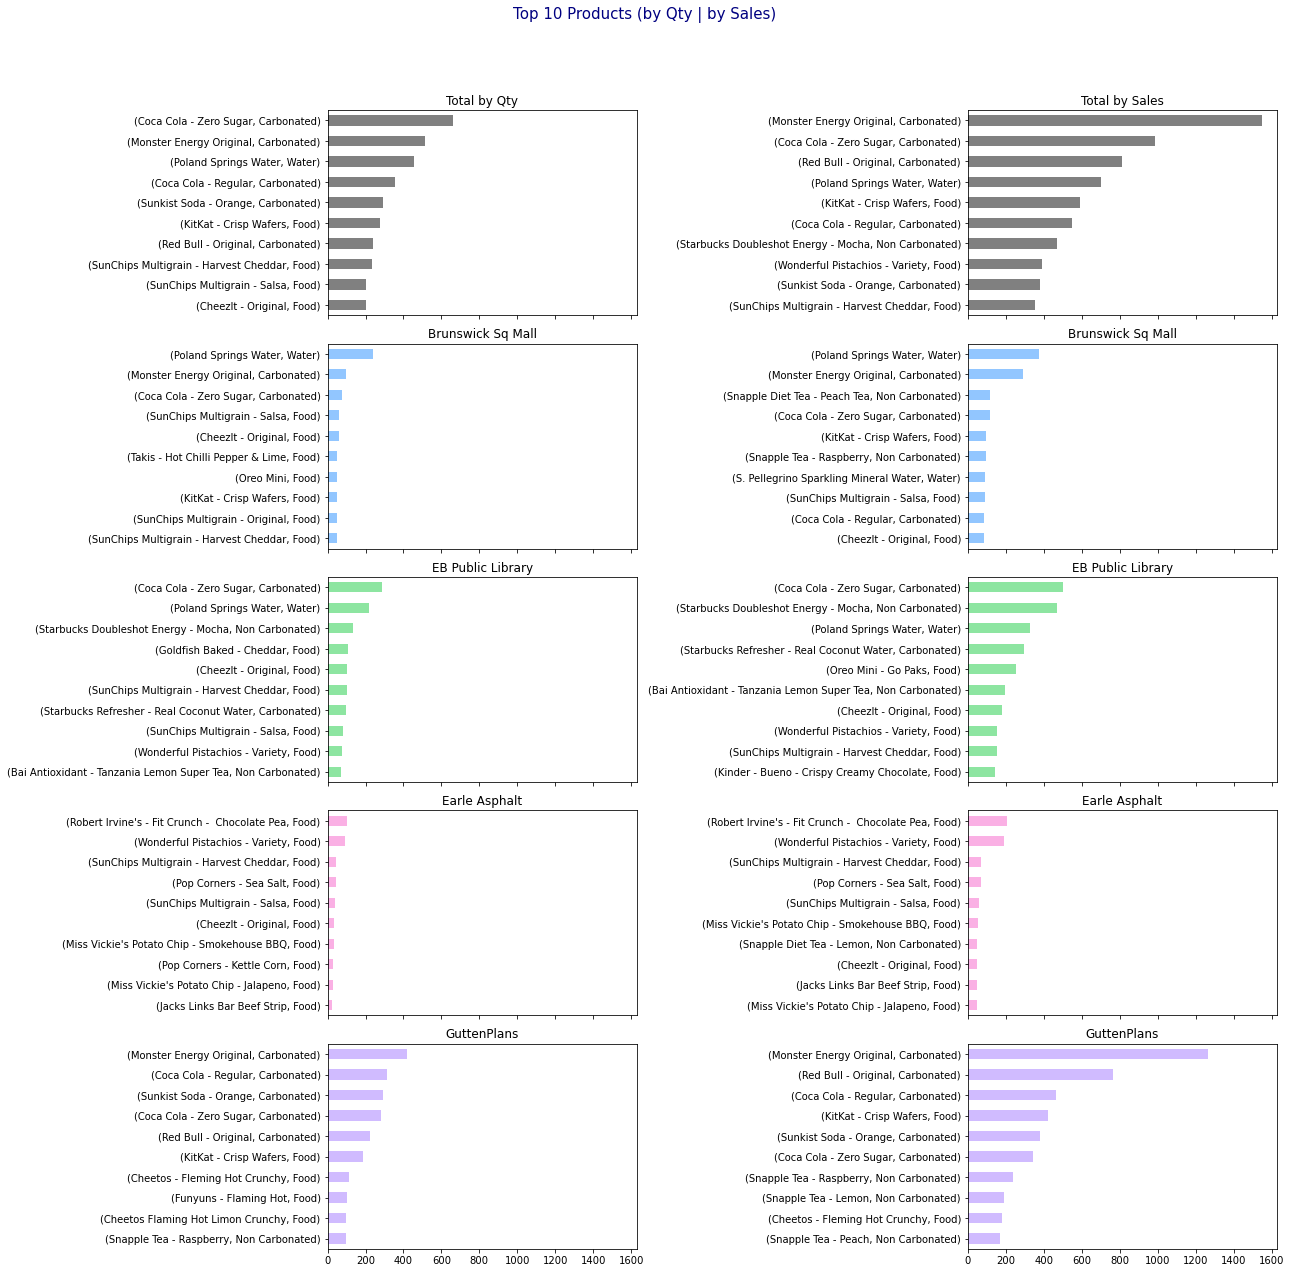

In [44]:
# find the top 10 products
fig, axs= plt.subplots(5, 2, figsize=(18,18), sharex=True)
plt.suptitle('Top 10 Products (by Qty | by Sales)', color='navy', fontsize=15)
df.groupby(['Product','Category'])['RQty'].sum().nlargest(10).sort_values().plot(kind='barh', color='gray', ax=axs[0][0])
df[df.Location=='Brunswick Sq Mall'].groupby(['Product','Category'])['RQty'].sum().nlargest(10).sort_values().plot(kind='barh', ax=axs[1][0])
df[df.Location=='EB Public Library'].groupby(['Product','Category'])['RQty'].sum().nlargest(10).sort_values().plot(kind='barh', color='#8de5a1', ax=axs[2][0])
df[df.Location=='Earle Asphalt'].groupby(['Product','Category'])['RQty'].sum().nlargest(10).sort_values().plot(kind='barh', color='#fab0e4', ax=axs[3][0])
df[df.Location=='GuttenPlans'].groupby(['Product','Category'])['RQty'].sum().nlargest(10).sort_values().plot(kind='barh', color='#d0bbff', ax=axs[4][0])

df.groupby(['Product','Category'])['LineTotal'].sum().nlargest(10).sort_values().plot(kind='barh', color='gray', ax=axs[0][1])
df[df.Location=='Brunswick Sq Mall'].groupby(['Product','Category'])['LineTotal'].sum().nlargest(10).sort_values().plot(kind='barh', ax=axs[1][1])
df[df.Location=='EB Public Library'].groupby(['Product','Category'])['LineTotal'].sum().nlargest(10).sort_values().plot(kind='barh', color='#8de5a1', ax=axs[2][1])
df[df.Location=='Earle Asphalt'].groupby(['Product','Category'])['LineTotal'].sum().nlargest(10).sort_values().plot(kind='barh', color='#fab0e4', ax=axs[3][1])
df[df.Location=='GuttenPlans'].groupby(['Product','Category'])['LineTotal'].sum().nlargest(10).sort_values().plot(kind='barh', color='#d0bbff', ax=axs[4][1])
axs[0][0].set_ylabel('')
axs[1][0].set_ylabel('')
axs[2][0].set_ylabel('')
axs[3][0].set_ylabel('')
axs[4][0].set_ylabel('')
axs[0][1].set_ylabel('')
axs[1][1].set_ylabel('')
axs[2][1].set_ylabel('')
axs[3][1].set_ylabel('')
axs[4][1].set_ylabel('')
axs[0][0].set_title('Total by Qty')
axs[1][0].set_title('Brunswick Sq Mall')
axs[2][0].set_title('EB Public Library')
axs[3][0].set_title('Earle Asphalt')
axs[4][0].set_title('GuttenPlans')
axs[0][1].set_title('Total by Sales')
axs[1][1].set_title('Brunswick Sq Mall')
axs[2][1].set_title('EB Public Library')
axs[3][1].set_title('Earle Asphalt')
axs[4][1].set_title('GuttenPlans')
plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

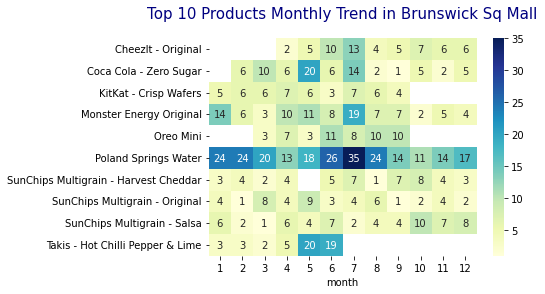

In [45]:
# find the top 10 products' trends in each location
l0=df[df.Location=='Brunswick Sq Mall'].groupby('Product')['RQty'].sum().nlargest(10).index
bl=l0.to_list()
agg3 = df[(df.Location=='Brunswick Sq Mall') & (df.Product.isin(bl))].groupby(['Product', 'month']).RQty.sum().reset_index()
pivot_table = agg3.pivot_table(index='Product', columns='month', values='RQty', aggfunc='sum')
sns.heatmap(data=pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Top 10 Products Monthly Trend in Brunswick Sq Mall', pad=20, color='navy', fontsize=15)
plt.ylabel('')
plt.show()

Poland Springs Water is clearly the top-demanding product at Brunswick Sq Mall and is the only product in the water category that made it into the top 10 demands.

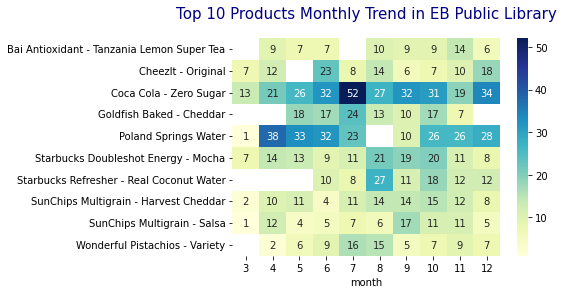

In [46]:
l1=df[df.Location=='EB Public Library'].groupby('Product')['RQty'].sum().nlargest(10).index
ebl=l1.to_list()
agg4 = df[(df.Location=='EB Public Library') & (df.Product.isin(ebl))].groupby(['Product', 'month']).RQty.sum().reset_index()
pivot_table1 = agg4.pivot_table(index='Product', columns='month', values='RQty', aggfunc='sum')
sns.heatmap(data=pivot_table1, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Top 10 Products Monthly Trend in EB Public Library', pad=20, color='navy', fontsize=15)
plt.ylabel('')
plt.show()

Poland Springs Water is the top demanding product at EB Public Library aside from Coca Cola-Zero Sugar. The observed 0 transactions in August might have been due to Poland Spring Water being out of stock. During the same month, there was an increased demand for Starbucks Refresher-Real Coconut Water. This suggests that Starbucks Refresher-Real Coconut Water is a substitute for Poland Springs Water.

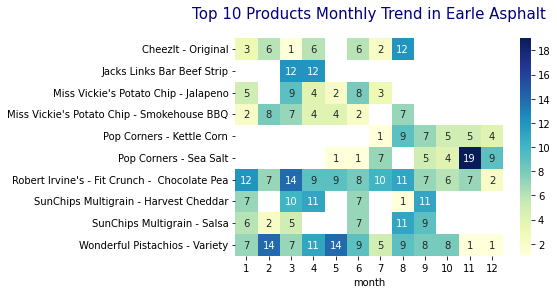

In [47]:
l2=df[df.Location=='Earle Asphalt'].groupby('Product')['RQty'].sum().nlargest(10).index
eal=l2.to_list()
agg5 = df[(df.Location=='Earle Asphalt') & (df.Product.isin(eal))].groupby(['Product', 'month']).RQty.sum().reset_index()
pivot_table2 = agg5.pivot_table(index='Product', columns='month', values='RQty', aggfunc='sum')
sns.heatmap(data=pivot_table2, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Top 10 Products Monthly Trend in Earle Asphalt', pad=20, color='navy', fontsize=15)
plt.ylabel('')
plt.show()

Aside from Robert Irvine's-Fit Crunch-Chocolate Pea and Wonderful Pistachinos-variety, there are many 0 transactions across the cross-tabulation. This may indicate diverse demand at Earle Asphalt or inconsistent allocation of the product mix. The peak demand for Pop Corners-Sea Salt in November should be investigated further to understand the cause of the sudden increase.

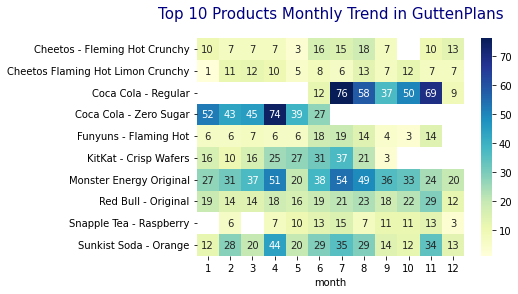

In [48]:
l3=df[df.Location=='GuttenPlans'].groupby('Product')['RQty'].sum().nlargest(10).index
gl=l3.to_list()
agg6 = df[(df.Location=='GuttenPlans') & (df.Product.isin(gl))].groupby(['Product', 'month']).RQty.sum().reset_index()
pivot_table3 = agg6.pivot_table(index='Product', columns='month', values='RQty', aggfunc='sum')
sns.heatmap(data=pivot_table3, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Top 10 Products Monthly Trend in GuttenPlans', pad=20, color='navy', fontsize=15)
plt.ylabel('')
plt.show()

The supply of Coca-Cola Regular and Coca-Cola Zero Sugar should be identified to determine whether they are substitutes or have their own separate demands.

## Price Sensitivity Analysis

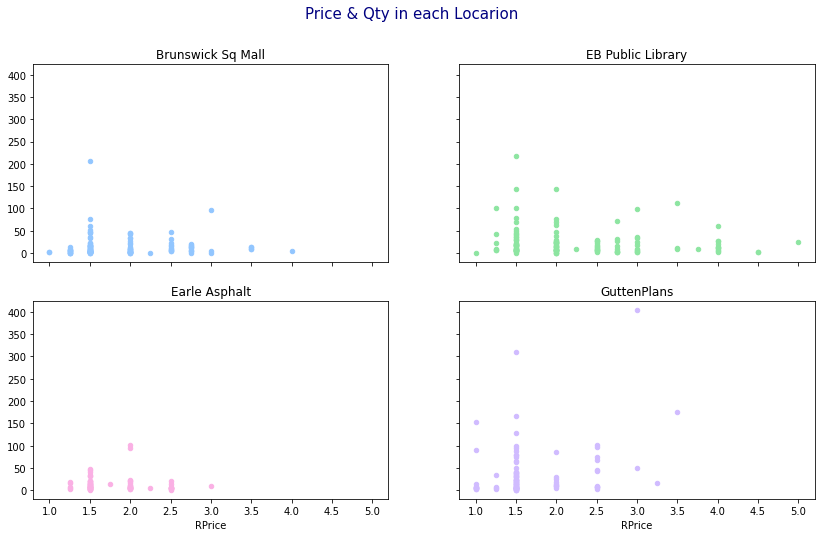

In [49]:
# examine the relationship between price and quantity
fig, axs= plt.subplots(2, 2, figsize=(14,8), sharex=True, sharey=True)
df[df.Location=='Brunswick Sq Mall'].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', ax=axs[0][0])
df[df.Location=='EB Public Library'].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', color='#8de5a1', ax=axs[0][1])
df[df.Location=='Earle Asphalt'].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', color='#fab0e4', ax=axs[1][0])
df[df.Location=='GuttenPlans'].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', color='#d0bbff', ax=axs[1][1])
axs[0][0].set_ylabel('')
axs[1][0].set_ylabel('')
axs[0][0].set_title('Brunswick Sq Mall')
axs[0][1].set_title('EB Public Library')
axs[1][0].set_title('Earle Asphalt')
axs[1][1].set_title('GuttenPlans')
plt.suptitle('Price & Qty in each Locarion', color='navy', fontsize=15)
plt.show()

Consumers at EB Public Library have the highest purchasing ability, with the highest product cost being $5, followed by Brunswick Sq Mall at $4, and then GuttenPlans and Earle Asphalt at $3.5 and $3, respectively.

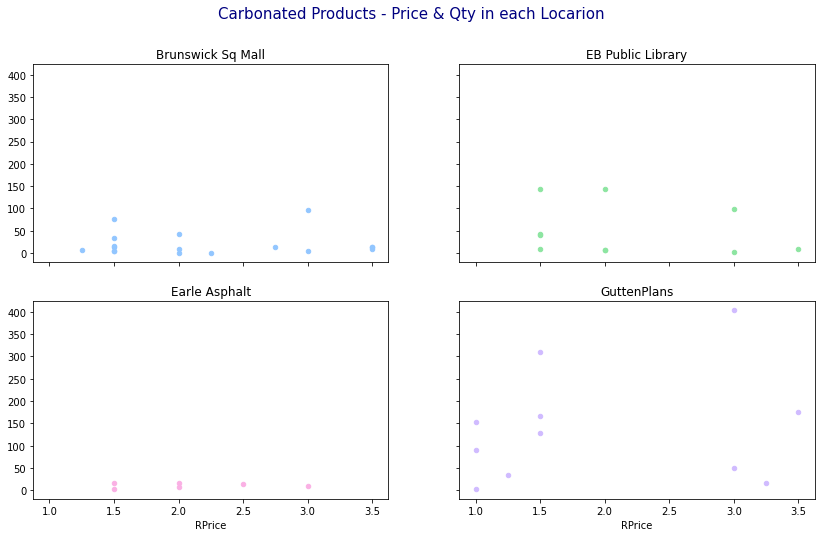

In [52]:
# examine the relationship between price and quantity in each category
fig, axs= plt.subplots(2, 2, figsize=(14,8), sharex=True, sharey=True)
df[(df.Location=='Brunswick Sq Mall') & (df.Category=='Carbonated')].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', ax=axs[0][0])
df[(df.Location=='EB Public Library') & (df.Category=='Carbonated')].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', color='#8de5a1', ax=axs[0][1])
df[(df.Location=='Earle Asphalt') & (df.Category=='Carbonated')].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', color='#fab0e4', ax=axs[1][0])
df[(df.Location=='GuttenPlans') & (df.Category=='Carbonated')].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', color='#d0bbff', ax=axs[1][1])
axs[0][0].set_ylabel('')
axs[1][0].set_ylabel('')
axs[0][0].set_title('Brunswick Sq Mall')
axs[0][1].set_title('EB Public Library')
axs[1][0].set_title('Earle Asphalt')
axs[1][1].set_title('GuttenPlans')
plt.suptitle('Carbonated Products - Price & Qty in each Locarion', color='navy', fontsize=15)
plt.show()

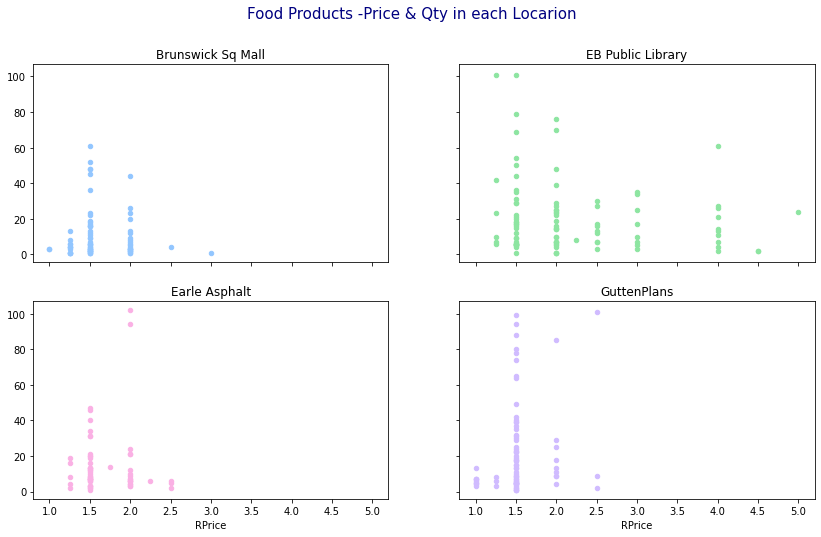

In [53]:
fig, axs= plt.subplots(2, 2, figsize=(14,8), sharex=True, sharey=True)
df[(df.Location=='Brunswick Sq Mall') & (df.Category=='Food')].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', ax=axs[0][0])
df[(df.Location=='EB Public Library') & (df.Category=='Food')].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', color='#8de5a1', ax=axs[0][1])
df[(df.Location=='Earle Asphalt') & (df.Category=='Food')].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', color='#fab0e4', ax=axs[1][0])
df[(df.Location=='GuttenPlans') & (df.Category=='Food')].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', color='#d0bbff', ax=axs[1][1])
axs[0][0].set_ylabel('')
axs[1][0].set_ylabel('')
axs[0][0].set_title('Brunswick Sq Mall')
axs[0][1].set_title('EB Public Library')
axs[1][0].set_title('Earle Asphalt')
axs[1][1].set_title('GuttenPlans')
plt.suptitle('Food Products -Price & Qty in each Locarion', color='navy', fontsize=15)
plt.show()

With the exception of EB Public Library, consumers at the other locations did not purchase food items priced over $3.

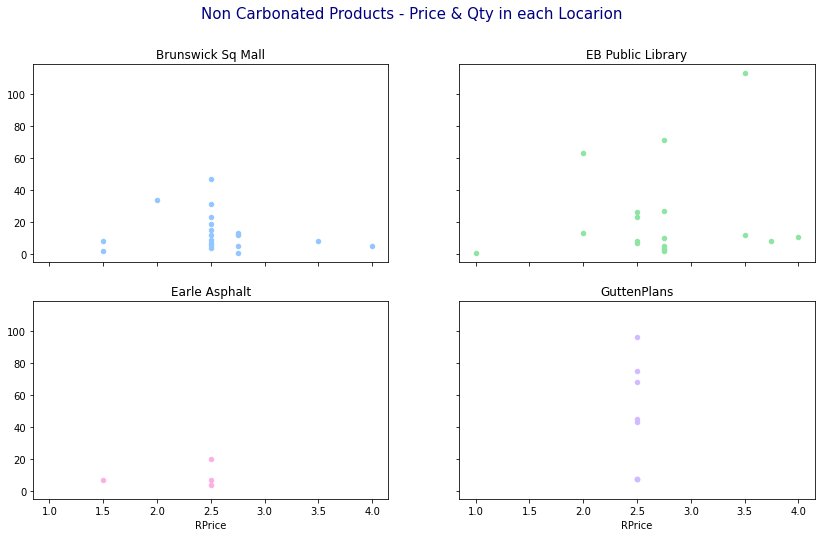

In [54]:
fig, axs= plt.subplots(2, 2, figsize=(14,8), sharex=True, sharey=True)
df[(df.Location=='Brunswick Sq Mall') & (df.Category=='Non Carbonated')].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', ax=axs[0][0])
df[(df.Location=='EB Public Library') & (df.Category=='Non Carbonated')].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', color='#8de5a1', ax=axs[0][1])
df[(df.Location=='Earle Asphalt') & (df.Category=='Non Carbonated')].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', color='#fab0e4', ax=axs[1][0])
df[(df.Location=='GuttenPlans') & (df.Category=='Non Carbonated')].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', color='#d0bbff', ax=axs[1][1])
axs[0][0].set_ylabel('')
axs[1][0].set_ylabel('')
axs[0][0].set_title('Brunswick Sq Mall')
axs[0][1].set_title('EB Public Library')
axs[1][0].set_title('Earle Asphalt')
axs[1][1].set_title('GuttenPlans')
plt.suptitle('Non Carbonated Products - Price & Qty in each Locarion', color='navy', fontsize=15)
plt.show()

EB Public Library has a high demand for a $3.5 non carbonated product, specifically Starbucks Doubleshot Energy_Mocha, while demand for non-carbonated products at other locations is around $2.5.

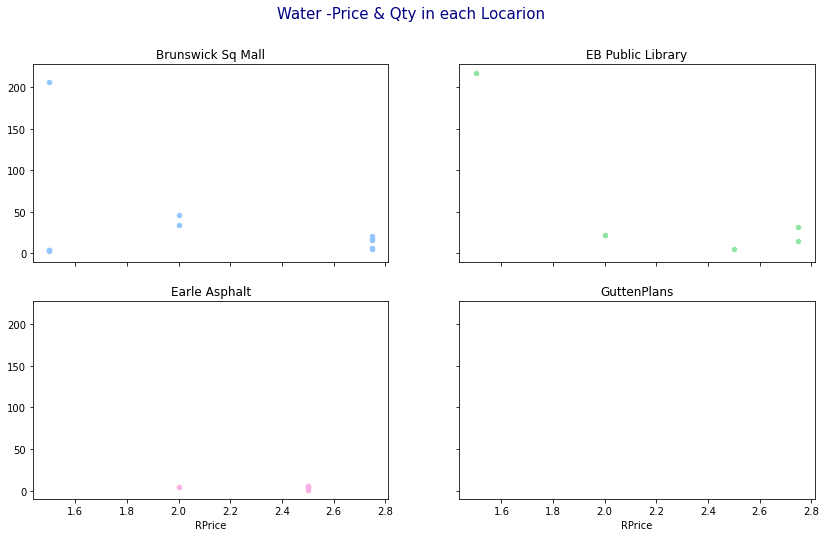

In [55]:
fig, axs= plt.subplots(2, 2, figsize=(14,8), sharex=True, sharey=True)
df[(df.Location=='Brunswick Sq Mall') & (df.Category=='Water')].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', ax=axs[0][0])
df[(df.Location=='EB Public Library') & (df.Category=='Water')].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', color='#8de5a1', ax=axs[0][1])
df[(df.Location=='Earle Asphalt') & (df.Category=='Water')].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', color='#fab0e4', ax=axs[1][0])
df[(df.Location=='GuttenPlans') & (df.Category=='Water')].groupby(['Product','RPrice'])['RQty'].sum().reset_index().plot(kind='scatter', x='RPrice', y='RQty', color='#d0bbff', ax=axs[1][1])
axs[0][0].set_ylabel('')
axs[1][0].set_ylabel('')
axs[0][0].set_title('Brunswick Sq Mall')
axs[0][1].set_title('EB Public Library')
axs[1][0].set_title('Earle Asphalt')
axs[1][1].set_title('GuttenPlans')
plt.suptitle('Water -Price & Qty in each Locarion', color='navy', fontsize=15)
plt.show()

## Insights & Recommendations
1. Brunswick Sq Mall ranked second in sales among the 4 locations. The top product at the mall is Poland Springs Water, and the Water category accounts for 20% of sales. However, **sales in the water category have dropped in Q4, and the root cause of the decrease needs to be investigated.**


2. EB Public Library possesses a sales record near the highest in all locations, and it also has the highest amount spent per transaction. This location offers a wider range of products with relatively low price sensitivity. **It is recommended to introduce more profitable or high-value products at this location to maximize profit.**


3. Earle Asphalt has the lowest sales and traffic, and it also offers the most limited products priced under $3, which might be the reason for the lower sales. **Introducing a greater variety of products to examine whether there is unmet demand in this area might help increase sales.**


4. GuttenPlans has the highest sales among all locations, with nearly 80% of transactions being paid in cash, and the demand is highly centralized. **Products in high demand should undergo inventory prediction to ensure that all demands are met. One thing to note is that there are no transactions in the water category. Further investigation is needed to determine whether there is no demand for water products or if there is a supply issue in this category.**